# **Feature Selection: Case study**

 **By Abhishek kumar kushwaha**

## About Case study:
 Feature selection is a process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in. Having
 irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

Dataset link:https://www.kaggle.com/datasets/arashnic/dynamic-pricing-dataset?resource=download

## Aim of the Project
The Aim is to conduct an Exploratory Data Analysis (EDA) to identify and select the most important features that influence the historical cost of a ride.

## Dataset Information:
 1. Number_of_Riders: This is an integer column that represents the number of riders.
 2. Number_of_Drivers: This is an integer column that represents the number of drivers.
 3. Location_Category: This is an object column that represents the category of the location
 (Urban, Suburban, Rural).
 4. Customer_Loyalty_Status: This is an object column that represents the loyalty status of the
 customer (Silver, Regular).
 5. Number_of_Past_Rides: This is an integer column that represents the number of past rides.
 6. Average_Ratings: This is a float column that represents the average ratings.
 7. Time_of_Booking: This is an object column that represents the time of booking (Night,
 Evening, Afternoon).
 8. Vehicle_Type: This is an object column that represents the type of vehicle (Premium,
 Economy).
 9. Expected_Ride_Duration: This is an integer column that represents the expected ride
 duration.
 10. Historical_Cost_of_Ride: This is a float column that represents the historical cost of the ride

##Process We can follow while performing EDA for Feature Selection:
 1. Begin by getting familiar with the dataset. It includes understanding the size, scope, and
 nature of the data (structured vs. unstructured), identifying each feature and its type
 (numerical, categorical), and recognizing the target variable.
 2. Identify and handle missing values by imputation, deletion, or estimation, depending on
 their nature and the proportion of missing data.
 3. Analyze the distribution of each feature using histograms, density plots, or bar charts for
 categorical variables.
 4. Conduct correlation analysis using Pearson, Spearman, or Kendall correlation coefficients to
 assess the relationship between numeric features and the target variable.
 5. Utilize scatter plots, pair plots, and heat maps to explore relationships between features.
 6. Based on insights gained through EDA, manually remove redundant features, features with
 very little variance, or features highly correlated with others.

Importing Libraries:

In [ ]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 sns.set_style("darkgrid")
 import warnings
 warnings.filterwarnings("ignore")
 %matplotlib inline

Loading Datasets


In [ ]:
df=pd.read_csv("dynamic_pricing.csv")

Data Preprocessing

In [ ]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [ ]:
#checking random sample rows
df.sample(5)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
914,38,12,Rural,Silver,44,4.85,Evening,Economy,110,356.881403
666,38,22,Suburban,Regular,18,4.17,Night,Premium,121,450.538753
339,49,14,Suburban,Silver,55,4.43,Morning,Premium,131,633.496622
172,53,33,Rural,Regular,40,3.80,Morning,Premium,139,507.950575
631,64,45,Rural,Gold,22,3.96,Night,Premium,118,404.601888


In [ ]:
#checking the shape of the Datasets
df.shape

(1000, 10)

This dataset contais 1000 rows and 10 features.

In [ ]:
#checking the missing values
df.isnull().sum()

,0
Number_of_Riders,0
Number_of_Drivers,0
Location_Category,0
Customer_Loyalty_Status,0
Number_of_Past_Rides,0
Average_Ratings,0
Time_of_Booking,0
Vehicle_Type,0
Expected_Ride_Duration,0
Historical_Cost_of_Ride,0


In [ ]:
#check the datatypes of the features
df.dtypes

,0
Number_of_Riders,int64
Number_of_Drivers,int64
Location_Category,object
Customer_Loyalty_Status,object
Number_of_Past_Rides,int64
Average_Ratings,float64
Time_of_Booking,object
Vehicle_Type,object
Expected_Ride_Duration,int64
Historical_Cost_of_Ride,float64


In [ ]:
#Making a report for missing values and its datatype
mv=df.isnull().sum()
dt=df.dtypes
mv_dt=pd.concat([mv,dt],axis=1)
mv_dt.columns=['Missing Values','Datatype']
mv_dt

,Missing Values,Datatype
Number_of_Riders,0,int64
Number_of_Drivers,0,int64
Location_Category,0,object
Customer_Loyalty_Status,0,object
Number_of_Past_Rides,0,int64
Average_Ratings,0,float64
Time_of_Booking,0,object
Vehicle_Type,0,object
Expected_Ride_Duration,0,int64
Historical_Cost_of_Ride,0,float64


Observation:

 The dataset does not contain any missing values and the data types seems appropriate for each feature.

In [ ]:
#gettting summary of numerical features
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [ ]:
#Getting a summary of Categorical features.
df.describe(include="object")

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
count,1000,1000,1000,1000
unique,3,3,4,2
top,Urban,Silver,Night,Premium
freq,346,367,276,522


 ## Univariate analysis

In [ ]:
 # checking the name of numerical columns without using lambda func.
 df.select_dtypes(include = 'number').columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
       'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride'],
      dtype='object')

In [ ]:
 # checking the name of categorical columns
 df.select_dtypes(include = 'object').columns

Index(['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking',
       'Vehicle_Type'],
      dtype='object')

In [ ]:
# Perform univariate analysis
 # define the numerical and categorical columns
numerical_cols = ['Number_of_Riders', 'Number_of_Drivers',
                'Number_of_Past_Rides','Average_Ratings','Expected_Ride_Duration', 'Historical_Cost_of_Ride']
categorical_cols = ['Location_Category', 'Customer_Loyalty_Status',
 'Time_of_Booking','Vehicle_Type']

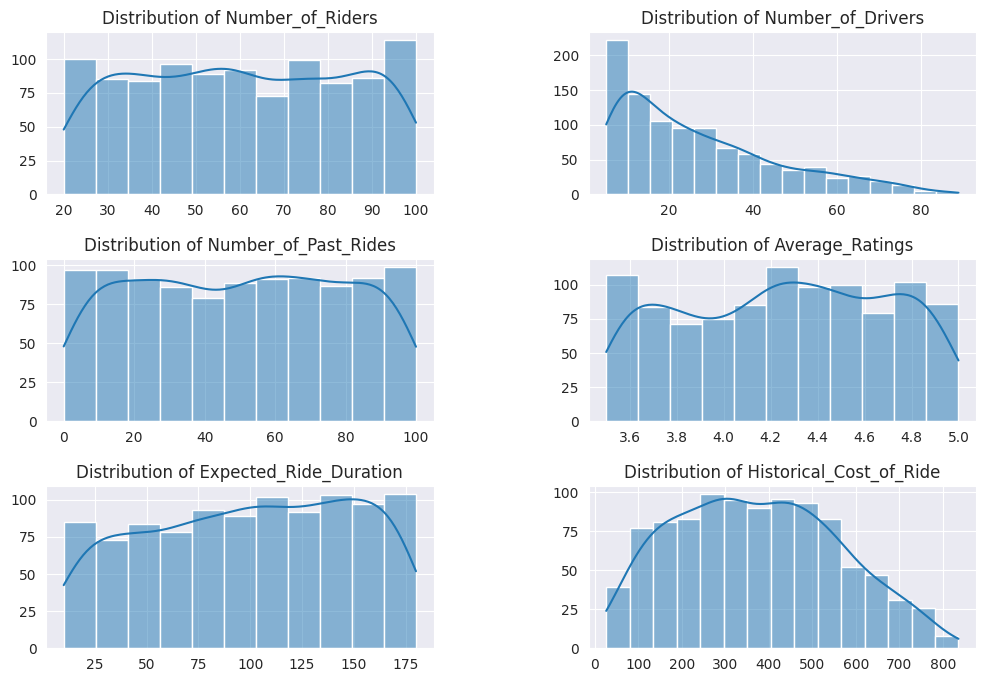

In [ ]:
 #plotting distribution for numerical features
 fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12,8))
 fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
 for i, col in enumerate(numerical_cols):
   sns.histplot(df[col], kde = True, ax=axes[i//2, i%2])
   axes[i//2, i%2].set_title(f'Distribution of {col}')
   axes[i//2, i%2].set_xlabel('')
   axes[i//2, i%2].set_ylabel('')

 Observatoins: The distribution for the numerical features provide

1. Number_of_Riders - The distribution is fairly uniform, with values ranging from 20 to 100 riders. It suggests a wide variation of numnbr of riders per ride.

2. Number_of_Drivers - It is skewed towards lower numbers, indicating that there are fewer drivers available compared to riders.

3. Number_of_Past_Rides - It is fairly even, though slightly skewed towards lower values.Indicate variablility in cutomer expefience with the service.

4. Average_Ratings - Mean rating is around 4.26, indicating positive feedback from cutomers.The minimum rating is 3.5 and the maximum is 5.

5. Expected_ride_duration - Ride duration varies from 10 to 180 minutes, with average duration of approx 99.59 minutes.

6. Historical_Cost_of_Ride - The cost varies from 26 to 836 units, with an average of 372.50.Skewed towards right, indicating most rides cost less than the mean.





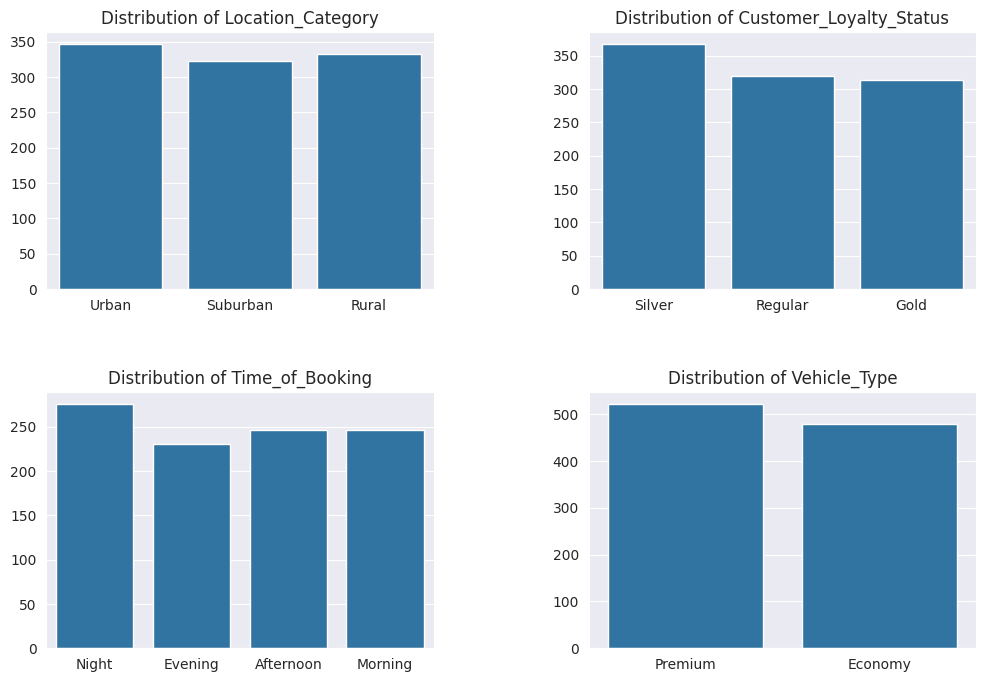

In [ ]:
# plotting distribution for categorical features
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, col in enumerate(categorical_cols):
  sns.countplot(data = df, x = col, ax = axes[i//2, i%2])
  axes[i//2,i%2].set_title(f'Distribution of {col}')
  axes[i//2,i%2].set_xlabel('')
  axes[i//2,i%2].set_ylabel('')

 Observation: The distribution for the categorical features provide

1. Location_category - It shows a variation with Urban likely the most common, followed by suburban and rural categories.

2. Cutomer_loyalty_Status - It shows that silver has higher loyalty status.

3. Time_Of_Booking - Most of the bookings happens at night.

4. Vehicle_type - There's a distribution across different vehicle types, such as "Premium" and
 "Morning".



## Bivariate Analysis

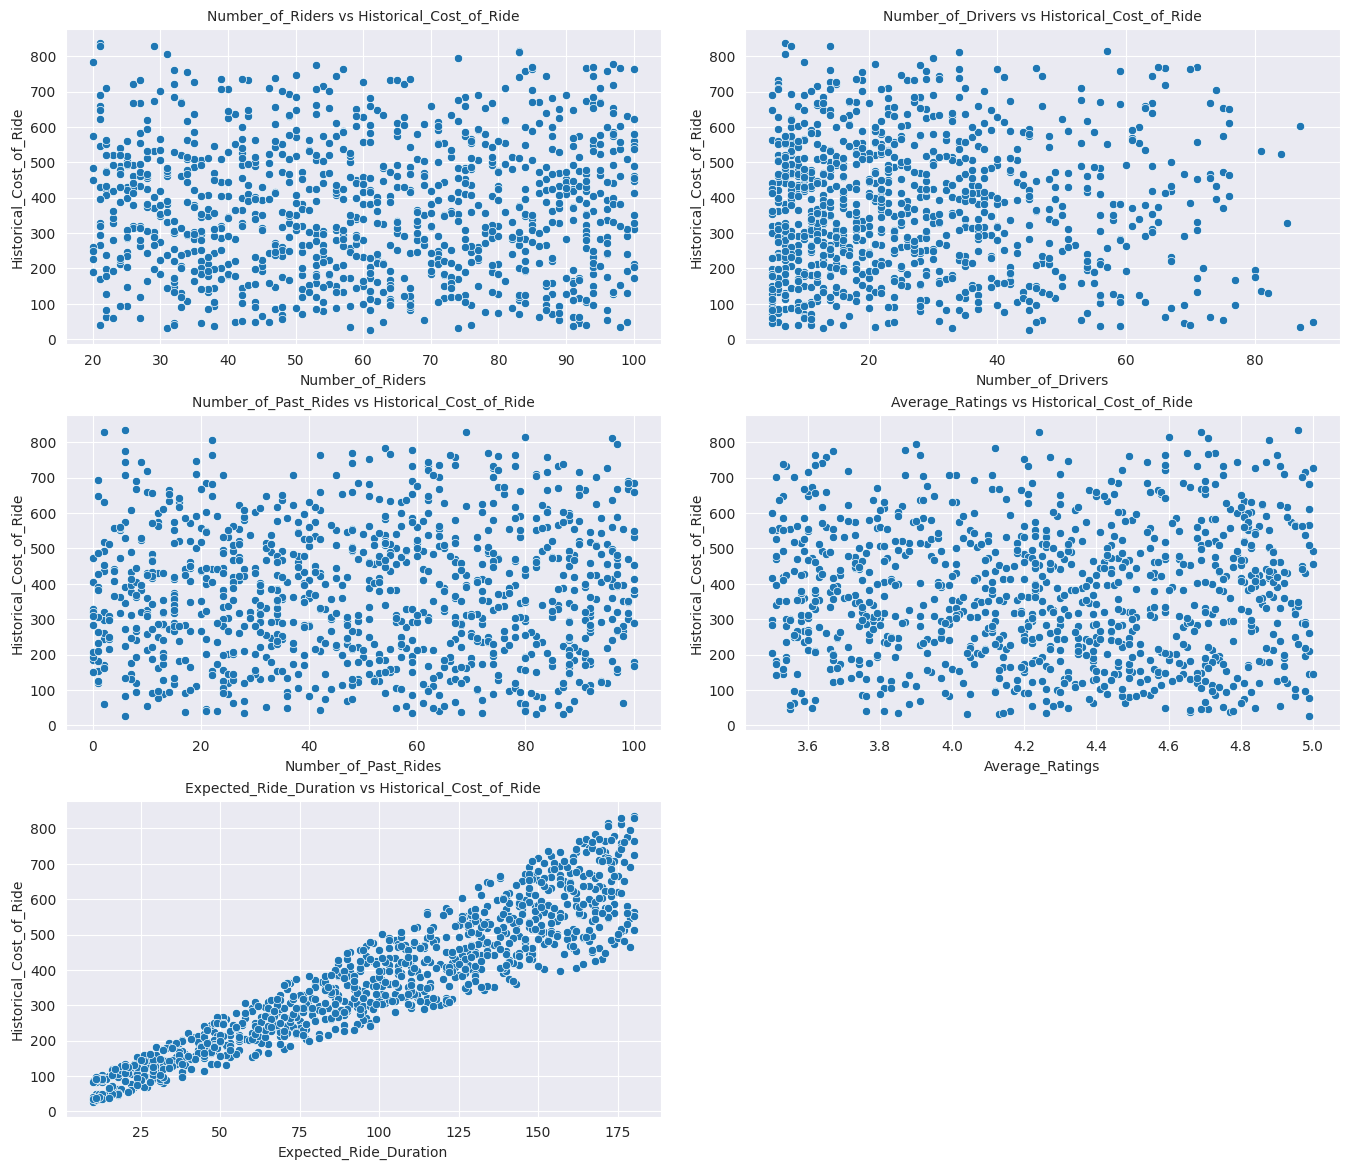

In [ ]:
# Explicitly exclude target variable
numerical_features = [col for col in numerical_cols if col != 'Historical_Cost_of_Ride']
num_plots = len(numerical_features)

# Calculate grid dimensions
n_cols = 2
n_rows = (num_plots + n_cols - 1) // n_cols  # Ensures correct rounding

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 4))
fig.tight_layout(pad=3.0)  # Adjust spacing
axes = np.array(axes).flatten()  # Safe flattening

# Plot each numerical feature against the target
for i, col in enumerate(numerical_features):
    sns.scatterplot(data=df, x=col, y='Historical_Cost_of_Ride', ax=axes[i])
    axes[i].set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Historical_Cost_of_Ride')

# Remove unused subplots
if num_plots < len(axes):
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

plt.show()

## Observations:

1. Number_of_Riders: There does not appear to be a clear linear relationship between the number of riders and the cost of the ride.

2. Number_of_Drivers: Similar to the number of riders, the number of drivers available does not show a clear linear relationship with the ride cost.

3. Number_of_Past_Rides: There is no evident linear relationship between the number of past rides a customer has had and the cost of their rides.

4. Average_Ratings: The scatter plot does not indicate a strong linear relationship between average ratings and ride cost.

5. Expected_Ride_Duration: There seems to be a more noticeable relationship here, with a potential trend indicating that longer expected ride durations are associated with higher costs.


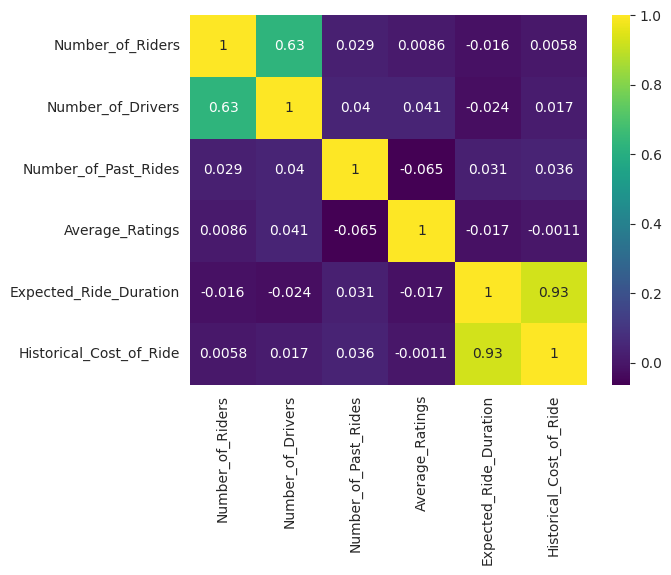

In [ ]:
 # Check the correlation between numerical features
 corr = df[['Number_of_Riders', 'Number_of_Drivers',
   'Number_of_Past_Rides','Average_Ratings',
   'Expected_Ride_Duration', 'Historical_Cost_of_Ride']].corr()
 sns.heatmap(corr, annot=True, cmap='viridis')
 plt.show()

Expected_Ride_Duration stands out as a numerical feature with a more discernible relationship to the Historical_Cost_of_Ride. The other numerical features do not show clear linear relationships with the ride cost, but they might still contribute information in combination with other features or through non-linear
relationships.

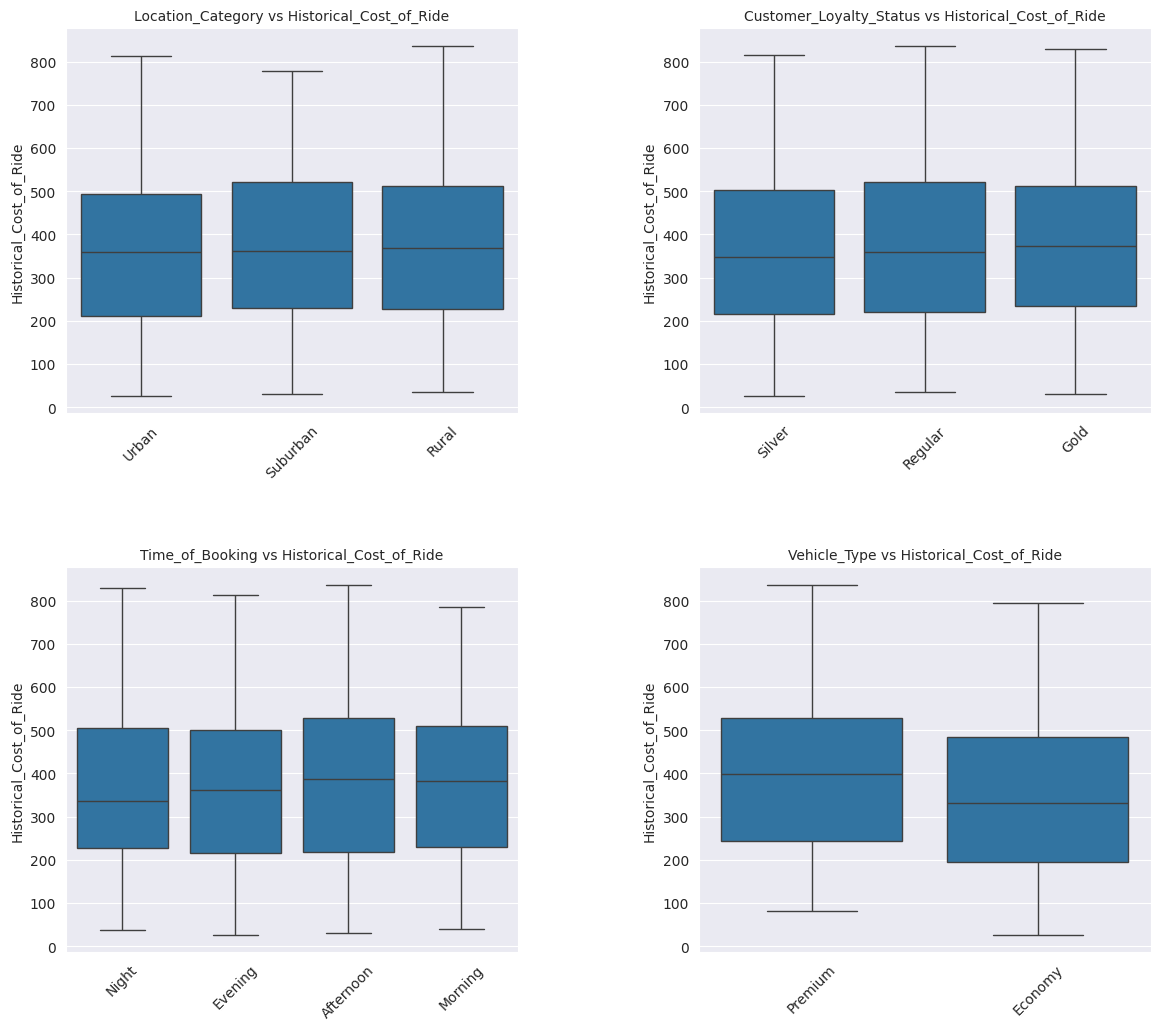

In [ ]:
# bivariate Analysis: categorical features vs historical_cost_of_ride
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, col in enumerate(categorical_cols):
   sns.boxplot(data=df, x=col, y='Historical_Cost_of_Ride', ax=axes[i//2, i%2])
   axes[i//2, i%2].set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
   axes[i//2, i%2].set_xlabel('')
   axes[i//2, i%2].set_ylabel('Historical_Cost_of_Ride')
   axes[i//2, i%2].tick_params(axis='x', rotation=45)

## Observations:

1. Location_Category: Ride costs vary by location category, with Urban locations showing a wider range and potentially higher median costs compared to other areas.

2. Customer_Loyalty_Status: There are noticeable differences in ride costs based on the loyalty status of the customer.

3. Time_of_Booking: The time of booking also impact ride costs, with certain times of day showing different cost distributions.

4. Vehicle_Type: Premium vehicles generally have higher costs compared to Economy vehicles indicating that vehicle type is a critical factor in pricing.




## Conclusion

 Based on the EDA, the following features are identified as potentially important for predicting
 ride costs:

 1. Expected_Ride_Duration: Shows a clear relationship with ride cost.
 2. Location_Category: Significant variance in costs by location.
 3. Customer_Loyalty_Status: Variability in costs suggests an impact on pricing.
 4. Time_of_Booking: Variations in costs indicate an influence of demand at different times.
 5. Vehicle_Type: Directly influences cost with clear distinctions between vehicle types.